# Finne objekter

https://pdfs.semanticscholar.org/0f1e/866c3acb8a10f96b432e86f8a61be5eb6799.pdf


Filen er funnet https://realpython.com/face-recognition-with-python/

Mer her: https://docs.opencv.org/3.3.0/d7/d8b/tutorial_py_face_detection.html

In [1]:
import cv2
import module_update

import nbpictures as nbp
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import numpy as np

Updated file nbtext.py
Updated file nbpictures.py


# Finne ansikter


In [42]:
def find_faces(image, scale=1.1, minNeighbors=5, cascade = "haarcascade_frontalface_default.xml"):

    faceCascade = cv2.CascadeClassifier(cascade)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=scale,
        minNeighbors=minNeighbors,
        minSize=(30, 30),
        #flags = cv2.cv.CV_HAAR_SCALE_IMAGE
    )

    return faces

In [75]:
def extract_face(image, face):
    from PIL import Image
    im = Image.fromarray(image)
    (x, y, w, h) = face
    crop_rectangle = (x, y, x+w, y+h)
    cropped_im = im.crop(crop_rectangle)

    return cropped_im

In [3]:
def mark_faces(faces, image):
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    

In [95]:
int(np.floor(3.0))

3

In [118]:
def show_pics(pics):
    """Show list of pictures"""
    
    cols = 6
    rows = int(np.ceil(len(pics)/cols))
    print(rows, cols)
    fig,axes = plt.subplots(nrows=rows, ncols = cols, figsize=(50,50))

    for ax in axes.flatten():
        ax.axis('off')

    ##edit this line to include your own image ids
    image_id_list=['{}_{}'.format(i,j) for i in range(2011,2016) for j in range(1,3)]
    r = 0
    c = 0
    for r in range(rows):
        for c in range(cols):
            picnum = (r+1)*c
            if picnum <= len(pics):
                axes[r,c].imshow(pics[picnum])
    plt.show()

In [27]:
bilder = nbp.find_urls('Oslo, kvinner')

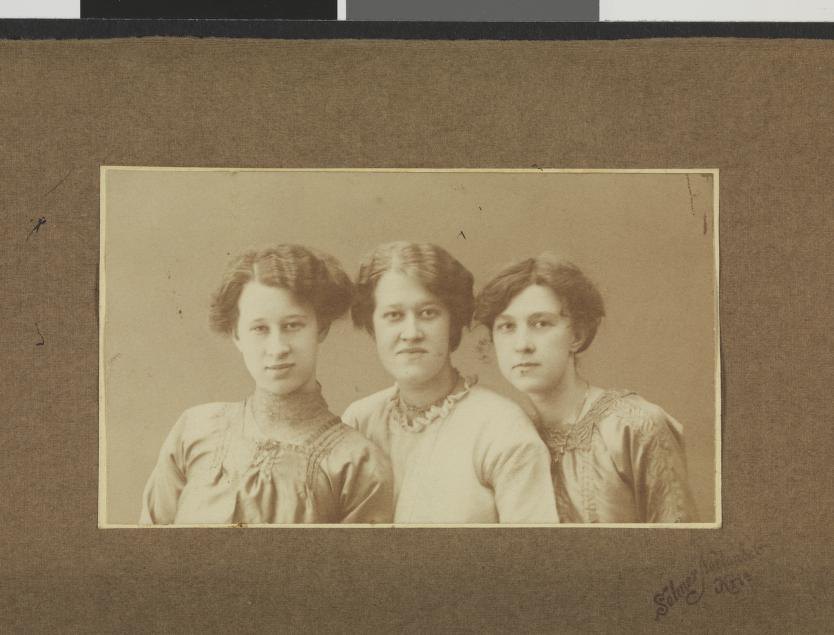

In [38]:
img = nbp.get_picture_from_url(bilder[3], height=500)
nb_image = np.array(img)
Image.fromarray(nb_image)

In [45]:
nb_faces = find_faces(nb_image, scale=1.03, minNeighbors=5)
len(nb_faces)

3

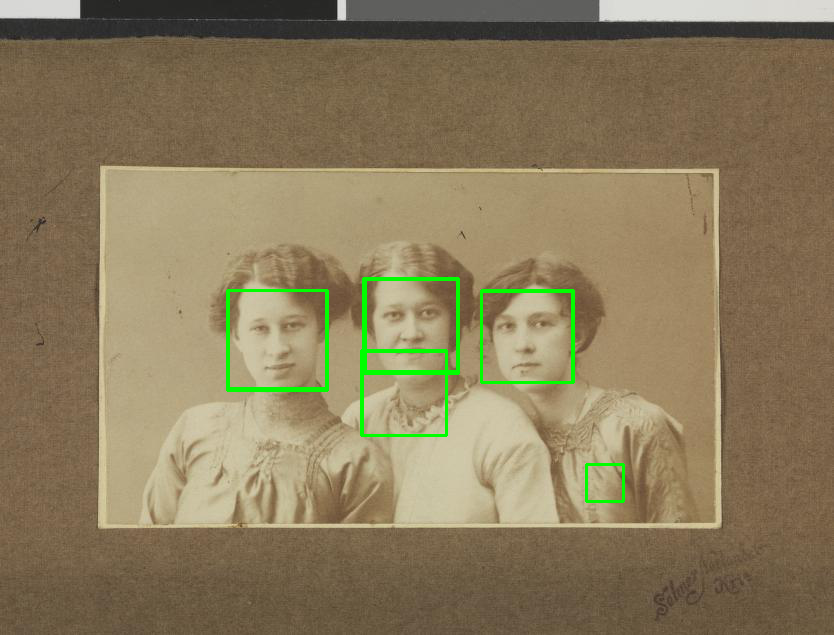

In [46]:
mark_faces(nb_faces, nb_image)
Image.fromarray(nb_image)

In [10]:
nbp.get_metadata_from_url(bilde[3])

{'Tilgang': 'Tilgang for alle',
 'Tittel': '[Portrett av tre uidentifiserte, unge kvinner]',
 'Andre opplysninger': 'En face, brystbilde.\n\nkvinner\nstudioportrett\nportrettfotografi\nBildet stammer fra Andre Bjerkes arkiv (Andre Bjerkes familie, slekt, venner og bekjente).',
 'Fotograf': 'Norland, Selmer Malvin',
 'Sted': 'Norge, Oslo, Oslo',
 'Kilde for metadata': 'mavis.nb.no (/TitleWork/key/1834322)',
 'Medietype': 'bilder',
 'Varig lenke': '<a href="https://urn.nb.no/URN:NBN:no-nb_digifoto_20141013_00001_bldsa_ab_0018" target="_blank">https://urn.nb.no/URN:NBN:no-nb_digifoto_20141013_00001_bldsa_ab_0018</a>',
 '': '<a href="https://www.nb.no/items/3c70b1a71fac02f65bfc7d4d35b5eec2?manifest=https://api.nb.no/catalog/v1/iiif/3c70b1a71fac02f65bfc7d4d35b5eec2/manifest" target="_blank"><img src="https://www.nb.no/content/uploads/2018/08/logo-iiif.png" alt="IIIF Drag-n-drop"></a>'}

In [105]:
med_ansikt = []
for b in bilder[:30]:
    nb_image = np.array(nbp.get_picture_from_url(b, height=500))
    try:
        faces = find_faces(nb_image, scale=1.3)
        if len(faces) > 0:
            #mark_faces(faces, nb_image)
            med_ansikt.append( (nb_image, faces))
    except:
        print('Noe gikk galt med', b)

Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20170112_00174_NB_MIT_FNR_13796_D/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20170126_00038_NB_HS_00428/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20170126_00037_NB_HS_00427/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20161208_00077_NB_HS_00448/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20161208_00080_NB_HS_00451/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20170403_00029_NB_MIT_GNR_10658/full/{width},{height}/0/native.jpg
Noe gikk galt med https://www.nb.no/services/image/resolver/URN:NBN:no-nb_digifoto_20141118_00017_NB_MIT_FNR_22148/ful

In [110]:
len(med_ansikt)

8

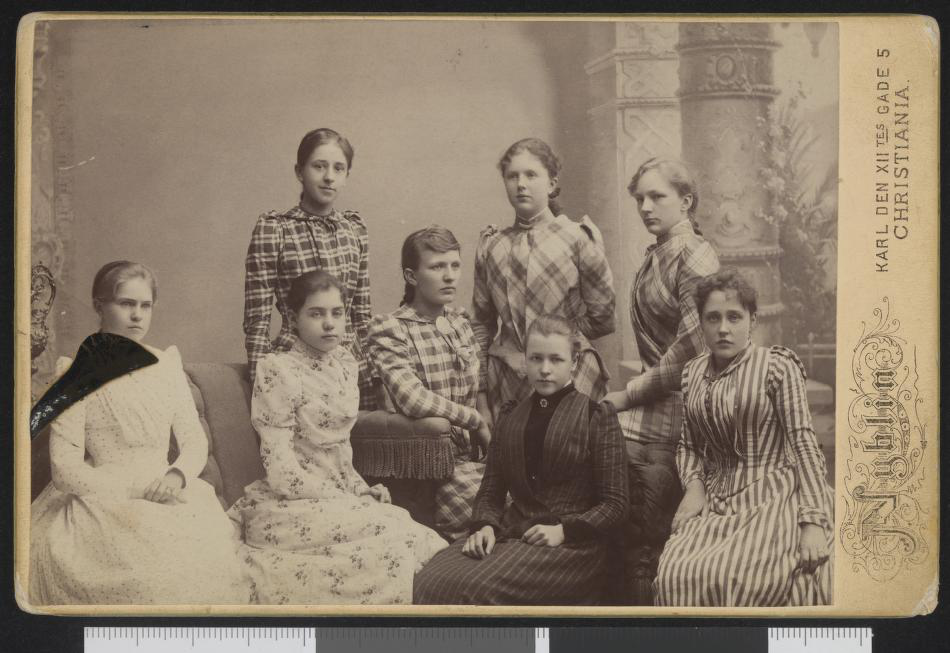

In [112]:
Image.fromarray(med_ansikt[7][0])

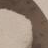

In [107]:
extract_face(med_ansikt[5][0], med_ansikt[2][1][1])

In [113]:
set_of_faces = []
for img in med_ansikt:
    for f in img[1]:
        set_of_faces.append(np.array(extract_face(img[0], f)))
    
    

In [114]:
len(set_of_faces)

22

4 6


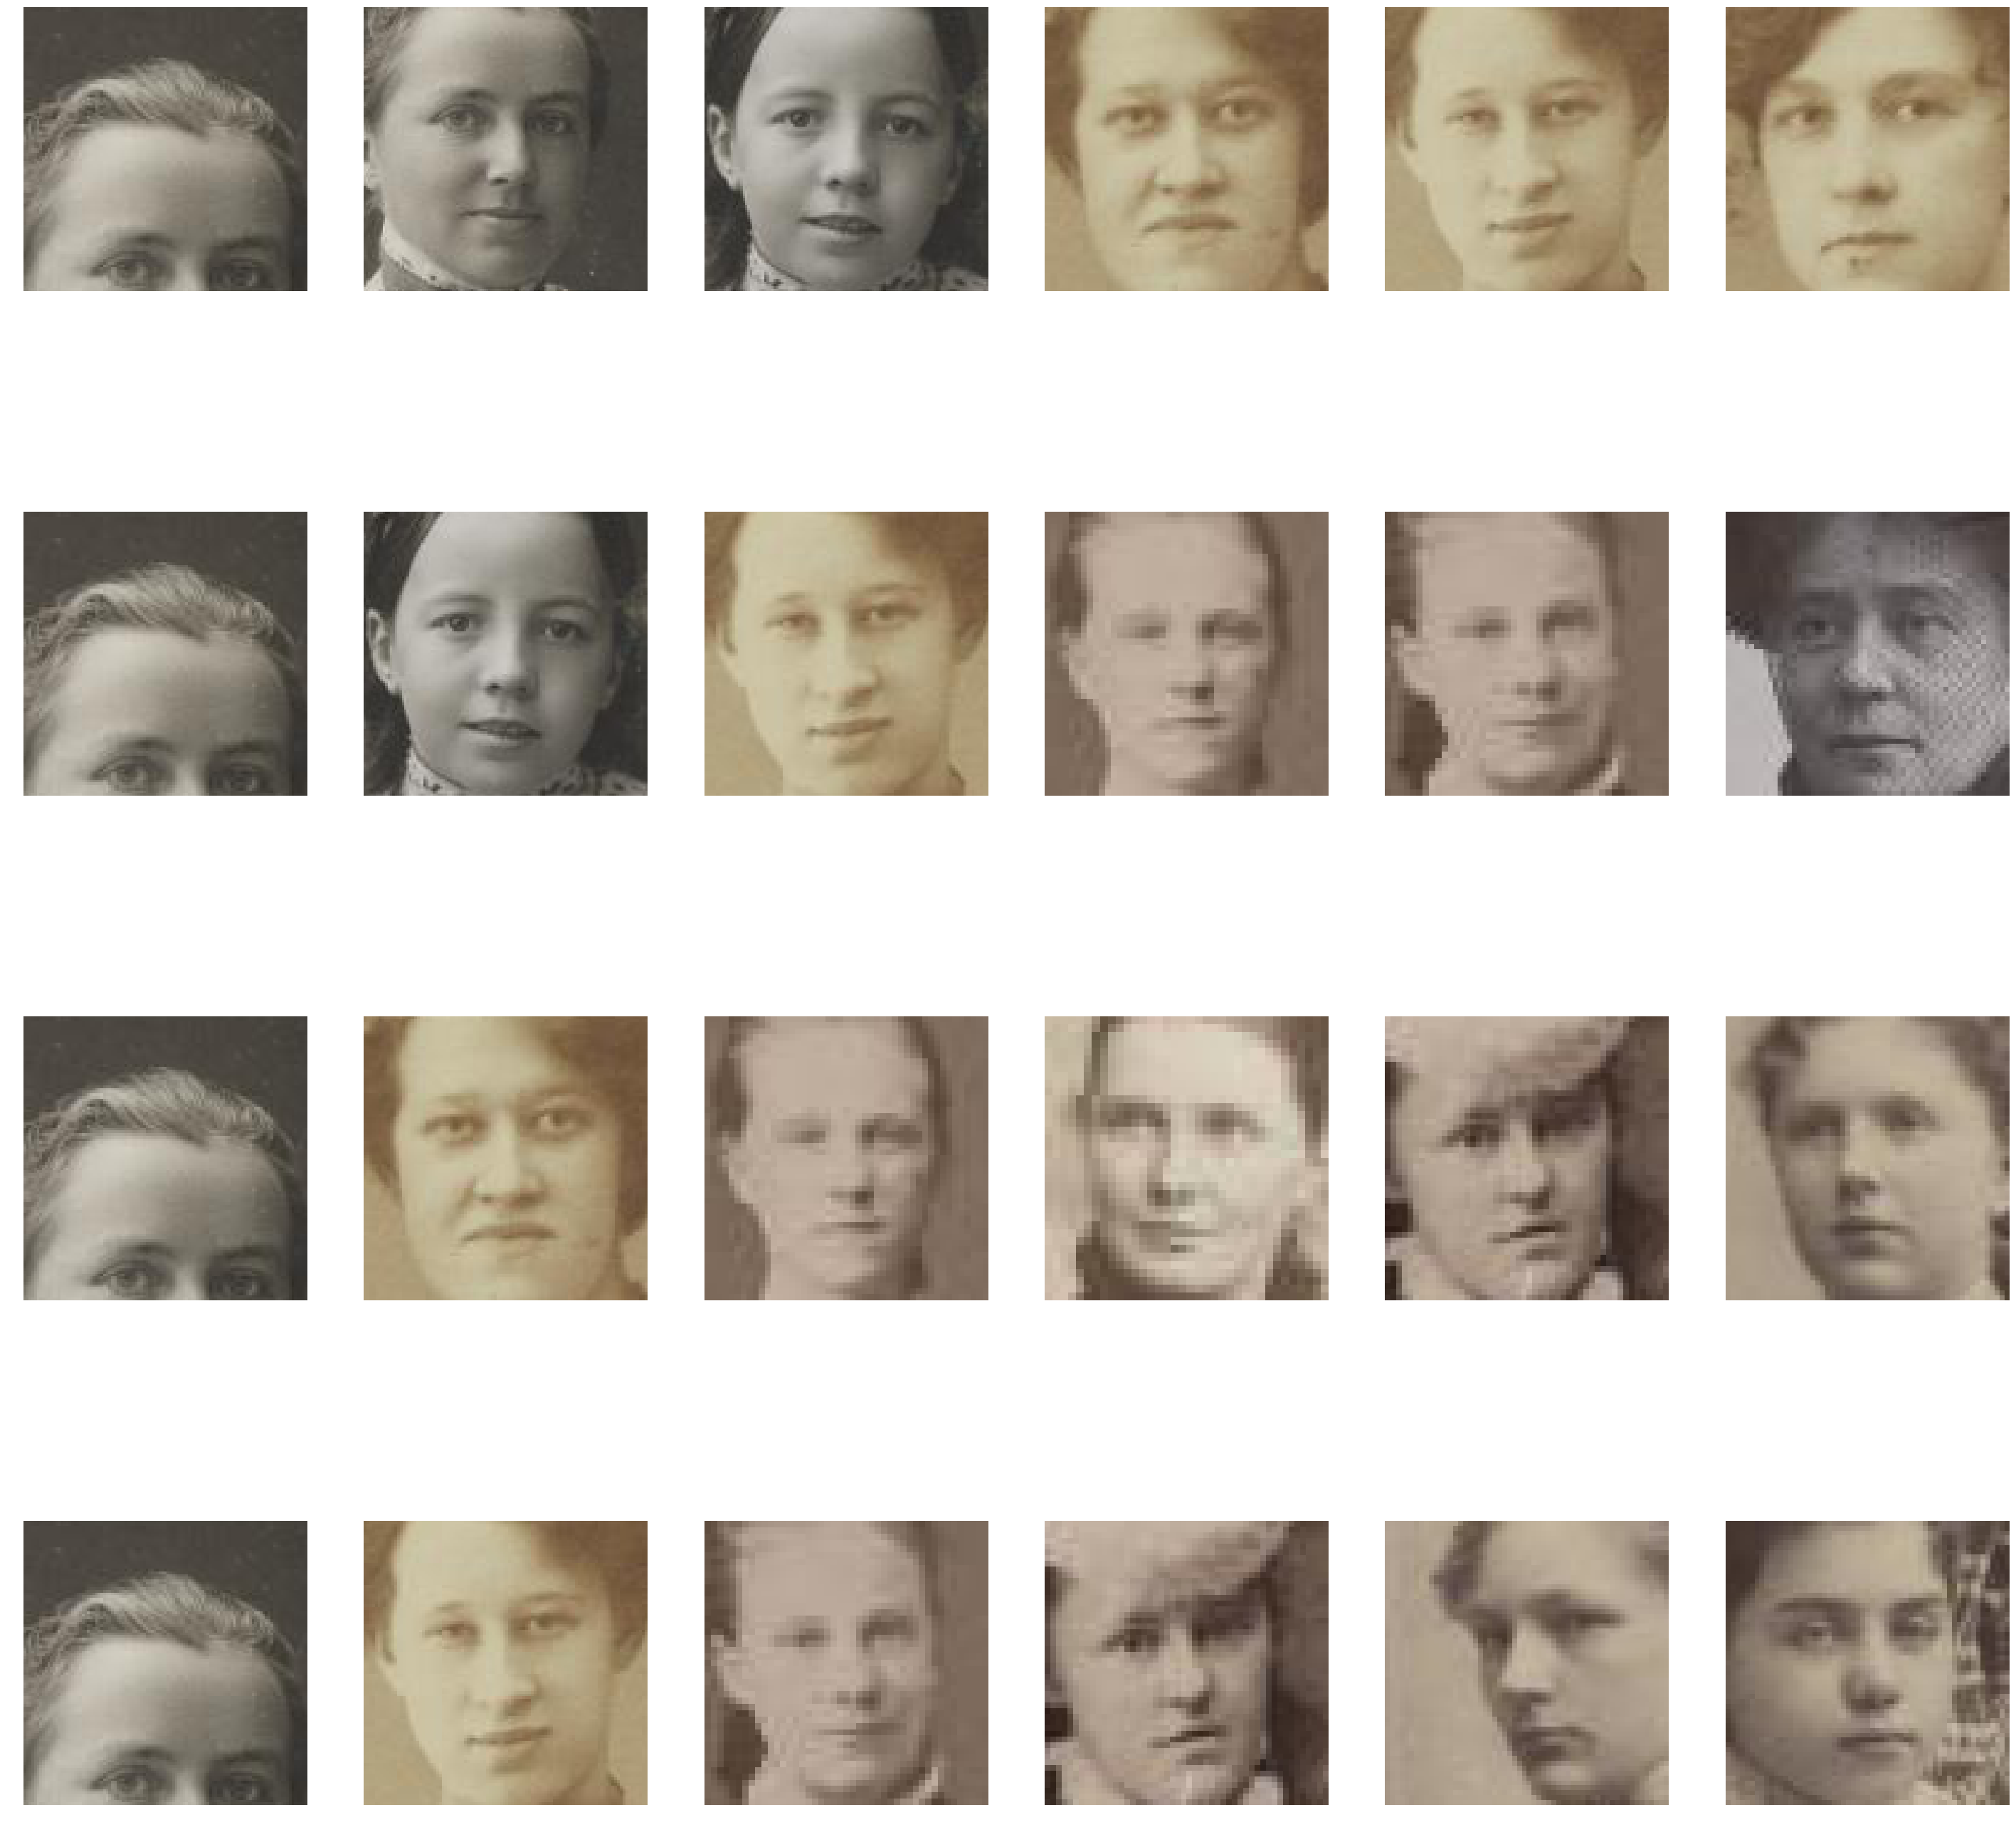

In [119]:
show_pics(set_of_faces)